In [1]:
#https://learn.microsoft.com/ko-kr/windows/ai/windows-ml/tutorials/pytorch-convert-model
#https://stackoverflow.com/questions/76839366/tf-rep-export-graphtf-model-path-keyerror-input-1
#https://www.tensorflow.org/lite/convert?hl=ko
#https://github.com/sithu31296/PyTorch-ONNX-TFLite

In [3]:
# onnx 변환
import torch
import torch.onnx
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

from outpainting import load_model

def representative_dataset_gen():
    for _ in range(100):
        yield [tf.random.normal([1, 3, 192, 192])]
        
for i in ['art', 'nat', 'rec']:
    name = f'G_{i}'
    # gen_model = load_model(f'{name}.pt')
    # dummy_input = torch.randn(1, 3, 192, 192)
    # onnx_model_path = f'{name}.onnx'
    # torch.onnx.export(gen_model, dummy_input, onnx_model_path, input_names=['input'], output_names=['output'], dynamic_axes={'input' : {0 : 'batch_size'}, 'output' : {0 : 'batch_size'}})
    # print(f"ONNX 모델이 {onnx_model_path}에 저장되었습니다.")
    
    # model = onnx.load(f'{name}.onnx')
    # onnx.checker.check_model(model)
    # tf_rep = prepare(model)
    # tf_rep.export_graph(f'{name}.ckpt')
    
    # converter = tf.lite.TFLiteConverter.from_saved_model(f'{name}.ckpt')
    # tflite_model = converter.convert()
    # with open(f'{name}_fp32.tflite', 'wb') as f:
    #     f.write(tflite_model)
        
    # converter = tf.lite.TFLiteConverter.from_saved_model(f'{name}.ckpt')
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # converter.target_spec.supported_types = [tf.float16]
    # tflite_model = converter.convert()
    # with open(f'{name}_fp16.tflite', 'wb') as f:
    #     f.write(tflite_model)
        
    converter = tf.lite.TFLiteConverter.from_saved_model(f'{name}.ckpt')
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.representative_dataset = representative_dataset_gen
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8
    converter.inference_output_type = tf.int8
    tflite_model = converter.convert()
    with open(f'{name}_int8.tflite', 'wb') as f:
        f.write(tflite_model)
        

ONNX 모델이 G_art.onnx에 저장되었습니다.
INFO:tensorflow:Assets written to: G_art.ckpt/assets


INFO:tensorflow:Assets written to: G_art.ckpt/assets
2024-05-28 15:19:43.733476: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-28 15:19:43.733516: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-28 15:19:43.733753: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: G_art.ckpt
2024-05-28 15:19:43.846042: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-28 15:19:43.846088: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: G_art.ckpt
2024-05-28 15:19:43.949352: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-28 15:19:44.082533: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: G_art.ckpt
2024-05-28 15:19:44.211962: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }

ONNX 모델이 G_nat.onnx에 저장되었습니다.
INFO:tensorflow:Assets written to: G_nat.ckpt/assets


INFO:tensorflow:Assets written to: G_nat.ckpt/assets
2024-05-28 15:20:44.468373: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-28 15:20:44.468412: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-28 15:20:44.468628: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: G_nat.ckpt
2024-05-28 15:20:44.578539: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-28 15:20:44.578586: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: G_nat.ckpt
2024-05-28 15:20:44.683616: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-28 15:20:44.830862: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: G_nat.ckpt
2024-05-28 15:20:44.960478: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }

ONNX 모델이 G_rec.onnx에 저장되었습니다.
INFO:tensorflow:Assets written to: G_rec.ckpt/assets


INFO:tensorflow:Assets written to: G_rec.ckpt/assets
2024-05-28 15:21:45.817772: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-28 15:21:45.817815: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-28 15:21:45.818037: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: G_rec.ckpt
2024-05-28 15:21:45.928072: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-28 15:21:45.928118: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: G_rec.ckpt
2024-05-28 15:21:46.031282: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-28 15:21:46.162433: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: G_rec.ckpt
2024-05-28 15:21:46.292024: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { serve }

# INFERENCE

In [35]:
import numpy as np
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="G_nat.tflite")
interpreter.allocate_tensors()

In [40]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
# Test the model on random input data
input_shape = input_details[0]['shape']
from PIL import Image

image_path = "./refer/1.JPG"
image = Image.open(image_path)
new_size = (192, 192)
input_data = np.array([np.float32(image.resize(new_size))]).transpose(0, 3, 1, 2)
input_data /= 255
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

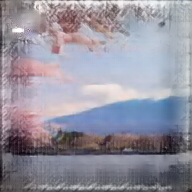

In [41]:
Image.fromarray((output_data.transpose(0, 2, 3, 1)[0]*255).astype('uint8'))

In [12]:
import torch
import torch.onnx
from outpainting import load_model, perform_outpaint
import matplotlib.pyplot as plt

gen_model = load_model('G_nat.pt')
input_img = plt.imread('./refer/1.JPG')[:, :, :3]
_, output = perform_outpaint(gen_model, input_img)
#output = gen_model(input_img)

Input size: (239, 245, 3)
Output size: (192, 192, 3)
Blended size: (358, 367, 3)
